# Mini Project 3

Choose a dataset or select a question and identify and gather the data you need. 
Perform EDA on the data, identify features and a target variable, and apply 
predictive models including `decision trees` and `ensemble methods`. Evaluate 
these and present your findings.

Present from slides in 8-12 minutes on Monday 2 August 2021

## Background
A game of chess is divided into three distinct phases, known as the Opening, the Middlegame, and the Endgame, each of which has its own strategies (although there are many strategies that apply equally to all three).

If neither player achieves a knockout blow in the middlegame, the game will eventually reach the endgame. This is the stage of the game when most of the pieces have been captured and only a few remain.
<div style="text-align: right">-Chess Strategy Online 2015</div>

In this project we will look into the Chess Endgame Database to find out the best endgame position for white and black, assuming white has a rook and king left, black only has the king left, and it is black's turn to move. The goal for White is to win the game, while the goal for Black is to force a draw. In this study, a draw occurs when `1) White cannot checkmate in 16 moves`, and `2) Black cannot make a move when it is his turn`.

## Goals
- Find the best position for white and black
- Develop a model to predict results according to the piece's position

## Dataset
Chess Endgame Database for White King and Rook against Black King (KRK) - Black-to-move Positions Drawn or Lost in N Moves.

## Source
Creators: Database generated by Michael Bain and Arthur van Hoff at the Turing Institute, Glasgow, UK.

Donor: Michael Bain (mike '@' cse.unsw.edu.au), AI Lab, Computer Science
University of New South Wales, Sydney 2052, Australia.

## Table of Contents
1. Import Libraries
2. Load Data
3. EDA and Clean Data
4. Feature Engineering
5. Modelling  
    5.1 Features  
    5.2 Labels  
    5.3 Problem Type  
    5.4 Split data  
    5.5 Decision Tree  
    5.6 Random Forest  
    5.7 Extra Trees  
    5.8 Ada Boost  
    5.9 LightGBM  
6. Testing

7. Conclusion

### 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import time

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn import metrics
from lightgbm import LGBMClassifier

import matplotlib.pyplot as plt
%matplotlib inline

### 2. Load data

In [2]:
# Load data generated from Optimal_Chess_KRK-Endgame_Position_(EDA)
df = pd.read_csv("clean_krk.csv")

# Complete data
df

# No draw data
# df.drop(df[df["winning_moves"] == 17].index, inplace=True)
# df

,Unnamed: 0,w_king_x,w_king_y,w_rook_x,w_rook_y,b_king_x,b_king_y,winning_moves,wk_bk,wr_bk,wk_wr,wk_o,wr_o,bk_o
0,0,1,1,2,3,3,2,17,2.236068,1.414214,2.236068,4.949747,2.915476,2.915476
1,1,1,1,3,1,3,2,17,2.236068,1.000000,2.000000,4.949747,3.807887,2.915476
2,2,1,1,3,1,4,1,17,3.000000,1.000000,2.000000,4.949747,3.807887,3.535534
3,3,1,1,3,1,4,2,17,3.162278,1.414214,2.000000,4.949747,3.807887,2.549510
4,4,1,1,3,2,3,1,17,2.000000,1.000000,2.236068,4.949747,2.915476,3.807887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28024,28051,2,1,7,7,5,5,16,5.000000,2.828427,7.810250,4.301163,3.535534,0.707107
28025,28052,2,1,7,7,5,6,16,5.830952,2.236068,7.810250,4.301163,3.535534,1.581139
28026,28053,2,1,7,7,5,7,16,6.708204,2.000000,7.810250,4.301163,3.535534,2.549510
28027,28054,2,1,7,7,6,5,16,5.656854,2.236068,7.810250,4.301163,3.535534,1.581139


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28029 entries, 0 to 28028
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     28029 non-null  int64  
 1   w_king_x       28029 non-null  int64  
 2   w_king_y       28029 non-null  int64  
 3   w_rook_x       28029 non-null  int64  
 4   w_rook_y       28029 non-null  int64  
 5   b_king_x       28029 non-null  int64  
 6   b_king_y       28029 non-null  int64  
 7   winning_moves  28029 non-null  int64  
 8   wk_bk          28029 non-null  float64
 9   wr_bk          28029 non-null  float64
 10  wk_wr          28029 non-null  float64
 11  wk_o           28029 non-null  float64
 12  wr_o           28029 non-null  float64
 13  bk_o           28029 non-null  float64
dtypes: float64(6), int64(8)
memory usage: 3.0 MB


### 3. EDA and Clean Data
See "Optimal_Chess_KRK-Endgame_Position_(EDA).ipynb"
### 4. Feature Engineering
See "Optimal_Chess_KRK-Endgame_Position_(EDA).ipynb"

### 5. Modelling

#### 5.1 Features

In [4]:
# Features are the distance between "White King - Black King", "White King - Centre", "Black King - Centre"
features = ["wk_bk", "wk_o", "bk_o"]
X = df[features]

#### 5.2 Labels

In [5]:
# Label is the white winning move. Since there are too many values, we group them up into four categories
# Winning move in 1-4: easy win
# Winning move in 5-12: normal win
# Winning move in 13-16: difficult win
# No winning move (17): draw
for i in df.index:
    if df.loc[i, "winning_moves"] <= 4:
        df.loc[i, "label"] = "easy win"
    elif df.loc[i, "winning_moves"] <= 12:
        df.loc[i, "label"] = "normal win"
    elif df.loc[i, "winning_moves"] <= 16:
        df.loc[i, "label"] = "difficult win"
    else:
        df.loc[i, "label"] = "draw"

y = df["label"]

#### 5.3 Problem Type

In [6]:
# Supervised Classification (multi-class)

#### 5.4 Split data

In [7]:
# 33% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

print("Training data shape\nX: {}, y: {}".format(X_train.shape, y_train.shape))
print("Testing data shape\nX: {}, y: {}".format(X_test.shape, y_test.shape))

Training data shape
X: (18779, 3), y: (18779,)
Testing data shape
X: (9250, 3), y: (9250,)


#### 5.5 Decision Tree

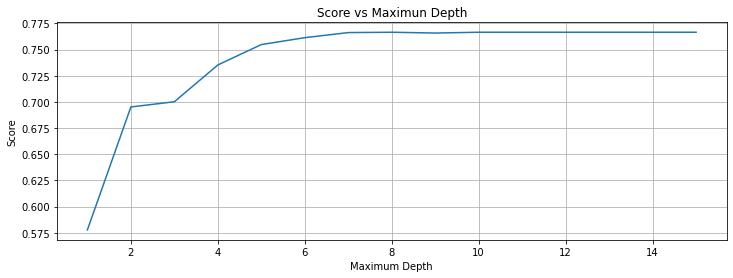

In [8]:
# Find best depth
max_depth = np.arange(1, 16)
score = []

for i in max_depth:
    dt = DecisionTreeClassifier(max_depth=i).fit(X_train, y_train)
    score.append(dt.score(X_test, y_test))

plt.figure(figsize=(12, 4))
plt.plot(max_depth, score)
plt.grid()
plt.xlabel("Maximum Depth")
plt.ylabel("Score")
plt.title("Score vs Maximun Depth")
plt.show()

In [9]:
best_depth = np.where(score == np.max(score))[0][0] + 1
print("Best Depth: %d" % best_depth)

Best Depth: 8


In [10]:
start = time.time()

# Create and fit model
dt = DecisionTreeClassifier(max_depth=best_depth).fit(X_train, y_train)

end = time.time()

time_dt = end - start

#### 5.6 Random Forest

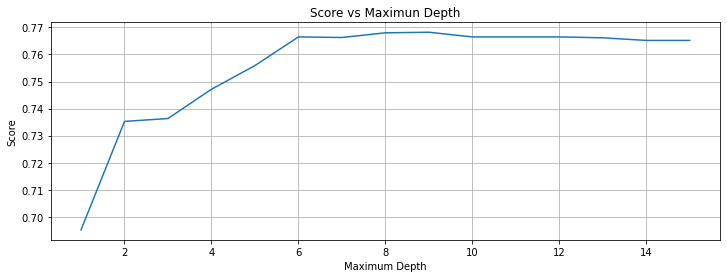

In [11]:
# Find best depth
max_depth = np.arange(1, 16)
score = []

for i in max_depth:
    rf = RandomForestClassifier(n_estimators=1000, max_depth=i).fit(X_train, y_train)
    score.append(rf.score(X_test, y_test))

plt.figure(figsize=(12, 4))
plt.plot(max_depth, score)
plt.grid()
plt.xlabel("Maximum Depth")
plt.ylabel("Score")
plt.title("Score vs Maximun Depth")
plt.show()

In [12]:
best_depth = np.where(score == np.max(score))[0][0] + 1
print("Best Depth: %d" % best_depth)

Best Depth: 9


In [13]:
start = time.time()

# Create and fit model
rf = RandomForestClassifier(n_estimators=1000, max_depth=best_depth).fit(X_train, y_train)

end = time.time()

time_rf = end - start

#### 5.7 Extra Trees

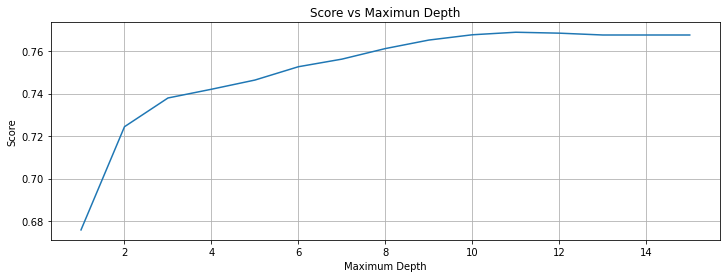

In [14]:
# Find best depth
max_depth = np.arange(1, 16)
score = []

for i in max_depth:
    et = ExtraTreesClassifier(n_estimators=500, max_depth=i, min_samples_leaf=2, n_jobs=-1).fit(X_train, y_train)
    score.append(et.score(X_test, y_test))

plt.figure(figsize=(12, 4))
plt.plot(max_depth, score)
plt.grid()
plt.xlabel("Maximum Depth")
plt.ylabel("Score")
plt.title("Score vs Maximun Depth")
plt.show()

In [15]:
best_depth = np.where(score == np.max(score))[0][0] + 1
print("Best Depth: %d" % best_depth)

Best Depth: 11


In [16]:
start = time.time()

# Create and fit model
et = ExtraTreesClassifier(n_estimators=500, max_depth=best_depth, min_samples_leaf=2, n_jobs=-1).fit(X_train, y_train)

end = time.time()

time_et = end - start

#### 5.8 Ada Boost

In [17]:
start = time.time()

# Create and fit model
ab = AdaBoostClassifier(n_estimators=100).fit(X_train, y_train)

end = time.time()

time_ab = end - start

#### 5.9 LightGBM

In [18]:
start = time.time()

# Create and fit model
lgbm = LGBMClassifier(objective="multiclass").fit(X_train, y_train)

end = time.time()

time_lgbm = end - start

### 6. Testing

In [19]:
# Prediction
def prediction(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred, average="micro")
    recall = metrics.recall_score(y_test, y_pred, average="micro")
    
    return accuracy, precision, recall

In [20]:
# Performance table
models = [dt, rf, et, ab, lgbm]
performance = []

for model in models:
    performance.append(prediction(model, X_test, y_test))

In [21]:
df_performance = pd.DataFrame(performance, 
                              columns=["accuracy", "precision", "recall"], 
                              index=["decision tree", "random forest", "extra tree", "ada boost", "light gbm"])
df_performance = df_performance.assign(process_time = [time_dt, time_rf, time_et, time_ab, time_lgbm])
df_performance

,accuracy,precision,recall,process_time
decision tree,0.766486,0.766486,0.766486,0.015649
random forest,0.768216,0.768216,0.768216,5.818937
extra tree,0.768432,0.768432,0.768432,1.311679
ada boost,0.685514,0.685514,0.685514,2.522392
light gbm,0.767459,0.767459,0.767459,0.531532


In [22]:
# Baseline accuracy
print(y.value_counts())
print("\nBaseline accuracy: %.2f" % (y.value_counts().max()/y.count()))

normal win       13327
difficult win    11303
draw              2796
easy win           603
Name: label, dtype: int64

Baseline accuracy: 0.48


### 7. Conclusion
The four models `Decision Tree`, `Random Forest`, `Extra Tree` and `Light GBM` have similar accuracy. In contrast, `Ada Boost` is relatively less accurate.

`Random Forest` and `Extra Tree` have a slightly better result, at the cost of much longer processing time.

When not considering "draw" (remove all rows with "draw"), the accuracy has become higher.